![](https://drive.google.com/uc?export=view&id=1-5X9OUkA-C2Ih1gOS9Jd7GmkTWUEpDg1)

Asignatura: Introducción a Data Science

Profesor: Juan Bekios Calfa

---


# Laboratorio Número 5: Clasificación Lineal (Parte 01)

**Alumno:**

* *Nombre y apellido alumno*
* *Nombre y apellido alumno* (Opcional)

**Objetivo:** 


*   Analizar los datos entregados para el laboratorio.
*   Bajar las imágenes alineadas y recortadas de la base de datos UTKFace (*Large Scale Face Dataset*).
*   Subir las imágenes a google Drive.
*   Separar las imágenes en un conjunto de entrenamiento y pruebas.
*   Implementar un modelo de clasificación utilizando SVM que identifique hombre de mujeres.
*   Sugerir un método para mejorar los resultados.
*   Comparar los resultados.
*   Generar conclusiones sobre los resultados obtenidos.


## Analizar los datos entregados para el laboratorio

### Cargar los datos

En el ejemplo se hace una carga utilizando *Google Drive*:

1.   Hacer click en la pestaña **Files** del panel de la izquierdo.
2.   Hacer click en ***Mount Drive***.
3.   Ir a la url indicada en *Go to this URL in a browser*.
4.   Copiar código de acceso y agregarlo a *Enter your authorization code*.
5.   Establecer la conexión con Pandas.

También se puede subir el archivo utilizando la opción *Upload* del panel izquierdo.





# 1. Cargar las imágenes para del laboratorio

Las imágenes son de una base de datos de caras llamada UTKFace.

El *dataset* UTKFace es un conjunto de datos faciales a gran escala con un rango de edad prolongado (rango de 0 a 116 años). El conjunto de datos consta de más de 20.000 imágenes de rostros con anotaciones de edad, sexo y etnia. Las imágenes cubren una gran variación en pose, expresión facial, iluminación, oclusión, resolución, etc. Este conjunto de datos podría usarse en una variedad de tareas, por ejemplo, detección de rostros, estimación de edad, progresión de edad. [Link UTKFace](https://susanqq.github.io/UTKFace/).

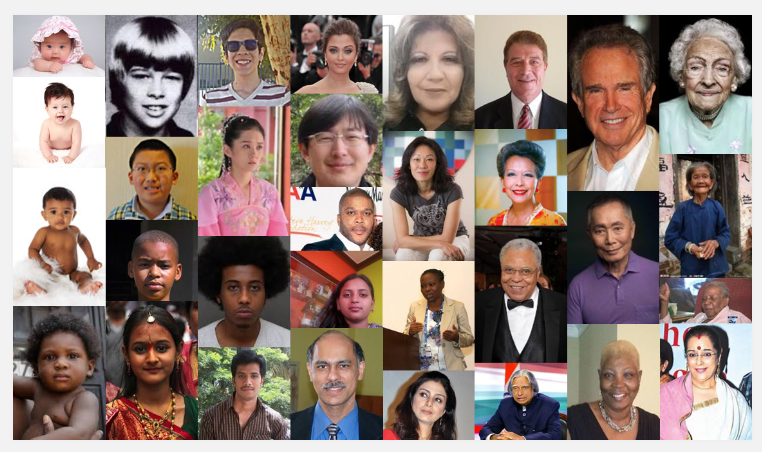

Para el ejercicio de clases utilizaremos las imágenes alineadas y recortadas que ya fueron procesadas.




Las imágenes se encuentran en el siguiente link de la página.

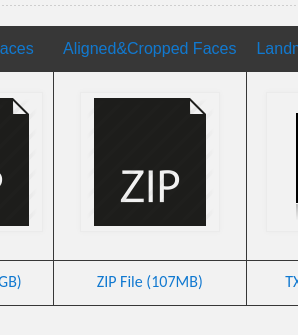

In [ ]:
# Importamos librerías necesarias para realizar los experimentos

import os # Comandos de sistema operativo 
import pandas as pd # Manipulación de datos con dataframe
import seaborn as sns # Librerías para gráficos
import matplotlib.pyplot as plt # Librerías para complementar gráficos
from PIL import Image, ImageOps # Librerías para manipulación de imágenes
import numpy as np # Librerías para matrices

Se debe descargar el archivo UTKFace.tar.gz. Una vez descargado, se debe descomprimir y subir a una carpeta de trabajo en google Drive.

## 1.1 Carga de imágenes

Montamos la unidad de disco donde se encuentran las imágenes.

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/COQ-ESC-UCN/Classes/IntroDataScience/IDS-2022-2/Laboratorio/Laboratorio05: Clasificacion/UTKFace

Obtenemos la ruta de cada imagen y obtenemos sus etiquetas.



In [ ]:
# Cargo los nombres de las imágenes que están en el directorio UTKFaces
res = os.listdir('.') 

print(res)

Creo un dataframe que contenga los nombres de las imágenes y las etiquetas para género, edad y etnia.

In [ ]:
dic = {"name_file":[], "gender":[]}

# Leo cada uno de los nombres de los archivos que están en google Drive y extraígo su información
for str in res:
  dic["name_file"].append(str)
  labels_str = str.split("_")
  gender = labels_str[1]
  dic["gender"].append(gender)

# Inicializo un data frame con los datos obtenidos en el diccionario
df = pd.DataFrame(dic)

df.head()

## Pregunta 01: Implementar un dataframe que contenga las columnas de nombre del archivo, género, edad y etnia. Llame al dataframe `df_full`.

In [ ]:
# Escriba el código aquí

# 2. Análisis exploratorio de los datos.

Analizaremos la distribución de los datos a analizar mediante un gráfico. En el caso del género se implementará un gráfico de barras debido a que ambas variables son categóricas (nominales).

In [ ]:
# Gráfico de barras
plt.figure(figsize=(10,6))
grafico = sns.countplot(data=df, x="gender")

plt.xlabel('Género', fontsize=14);
plt.ylabel('Número de ocurrencias', fontsize=14);
plt.title('Número de hombres y mujeres en el dataset', fontsize=18)

## Pregunta 02: Implementar un gráfico que indique en género cual es la barra para mujer y cual es la de hombre. Utilice el dataframe `df_full`.

## Pregunta 03: Implementar un gráfico para ver la distribución de las edades. Utilice el dataframe `df_full`.

## Pregunta 04: Implementar un gráfico para ver la distribución de las etnias, coloque en cada categoría un nombre que sea representativo. Utilice el dataframe `df_full`.

# 3. Cargar las imágenes para formar el dataset de experimentos

Para continuar con los experimentos se debe cargar el dataset con las imágenes, las cuales deben acondicionarse para poder utilizarse en un clasificador.

Las imágenes originales son en colores de 200x200 pixeles.

Para los experimentos se probarán imágenes de 12x12, 24x24, 32x32, 64x64 y 128x128.

Cargaremos las imágenes en formato de 12x12.

1. Cargar una imagen utilizando la librería PIL.

In [ ]:
# Abrir una imagen con PIL
im = Image.open(df["name_file"][2]) 

#np.asarray(im).shape
display(im)

2. Transformar la imagen a escala de grises.

In [ ]:
im2 = ImageOps.grayscale(im)

#np.asarray(im2).shape
display(im2)

3. Reescalar la imagen a un tamaño de 12x12.

In [ ]:
im3 = im2.resize((12, 12))

np.asarray(im3)
#display(im3)

4. Vectorizar imagen

In [ ]:
vec1 = np.asarray(im3)

print(vec1.flatten())

## Pregunta 05: Construir una matriz donde cada fila sea una imagen vectorizada. Mostrar las 5 primeras filas.